In [1]:
!pip install openpyxl

     |████████████████████████████████| 174kB 1.5MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/f0/da/572cbc0bc582390480bbd7c4e93d14dc46079778ed915b505dc494b37c57/jdcal-1.4.1-py2.py3-none-any.whl
  Created wheel for openpyxl: filename=openpyxl-3.0.1-py2.py3-none-any.whl size=241201 sha256=0a96e1f968c3ad3ced37a3f14594a6c360cbde843793ac1963e7cdf122d208b1
  Stored in directory: /home/jovyan/.cache/pip/wheels/5b/32/e1/02a81f730100b782bf3d439f5e2a431b93d82223888fefa6f3
Successfully built openpyxl


In [3]:
import os
import io
import collections
import pandas as pd
import matplotlib.pyplot as plt
from rdflib import ConjunctiveGraph
from rdflib.plugins.sparql.results.csvresults import CSVResultSerializer

pd.set_option('display.max_colwidth', 200)

if not os.path.exists('outputs'):
    os.makedirs('outputs')
    
g = ConjunctiveGraph()
g.parse('data.trig', format='trig')

def query(q):
    serializer = CSVResultSerializer(g.query(q))
    output = io.BytesIO()
    serializer.serialize(output)
    return pd.read_csv(io.StringIO(output.getvalue().decode('utf-8')), encoding='utf-8')
    
def write(df, fn):
    df.to_excel('outputs/{}'.format(fn), encoding='utf-8')

In [133]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?date ?ri_acronym ?ri_website ?ri_domain ?rep_label WHERE {
    ?g dcterms:date ?date .
    GRAPH ?g { 
        ?ri a rm:ResearchInfrastructure .
        ?ri envri:acronym ?ri_acronym . 
        ?ri envri:website ?ri_website .
        ?ri envri:hasDomain ?ri_domain .
        ?ri envri:hasRepository ?rep .
        ?rep a envri:Repository .
        ?rep rdfs:label ?rep_label .
    }
    FILTER (?date > "2019-01-01"^^xsd:date)
    # FILTER (?ri_acronym = "ICOS")
}
""")

display(q)
write(q, 'output-1repos.xlsx')

,date,ri_acronym,ri_website,ri_domain,rep_label
0,2019-04-01,ICOS,http://www.icos-cp.eu,n210,Carbon Portal
1,2019-04-03,SIOS,https://sios-svalbard.org/,n141,norwegian Polar Data Centre
2,2019-04-03,SIOS,https://sios-svalbard.org/,n141,norwegian Meteorological Institute
3,2019-03-19,eLTER,http://www.lter-europe.net/elter,n81,eLTER CDN
4,2019-03-19,eLTER,http://www.lter-europe.net/elter,n81,DEIMS-SDR
5,2019-03-19,eLTER,http://www.lter-europe.net/elter,n81,EUDAT/FZJ B2SHARE
6,2019-06-24,LifeWatch,http://www.lifewatch.eu,n5,LifeWatch Italy Portal
7,2019-09-03,ANAEE-France,http://www.anaee-france.fr,n56,ANAEE-France Metadata Catalog


In [102]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?vocab_name ?vocab_iri WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasVocabularies [
           envri:hasName ?vocab_name ;
           envri:hasVocabularyIri ?vocab_iri 
         ]
       ]
}
""")

display(q)
write(q, 'output-2.xlsx')

,rep_label,vocab_name,vocab_iri
0,norwegian Polar Data Centre,CF standard names,http://cfconventions.org/latest.html
1,EUROBIS,Marine species,http://www.marinespecies.org/
2,EUROBIS,WoRMS,http://www.marinespecies.org/
3,EUROBIS,Marine Regions,http://www.marineregions.org/
4,Marine Data Archive,Marine species,http://www.marinespecies.org/
5,Marine Data Archive,Marine Regions,http://www.marineregions.org/
6,Marine Data Archive,WoRMS,http://www.marinespecies.org/
7,SeaDataNet Central Data Products,ISO 19115/19139,http://standards.iso.org/ittf/PubliclyAvailableStandards/ISO_19139_Schemas/resources/codelist/ML_gmxCodelists.xml
8,SeaDataNet Central Data Products,SeaDataNet CDI,https://cdi.seadatanet.org
9,SeaDataNet Central Data Products,EDMO,https://edmo.seadatanet.org


In [81]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>

SELECT ?p WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
}
""")

display(q)
write(q, 'output-3.xlsx')

,p
0,http://envri.eu/ns/contentAccessAuthorizationRequired
1,http://envri.eu/ns/maintainsOwnUserDatabase
2,http://envri.eu/ns/hasAuthenticationMethod
3,http://envri.eu/ns/usesAuthorisationTechnique


In [82]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-4.xlsx')

,l,p,o,li
0,SDN SeaDataNet Common DAta Index (CDI) metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/ISO19115_19139,NaN
1,SDN SeaDataNet Common DAta Index (CDI) metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/SeaDataNetCommunityProfile,NaN
2,LW (Marine) EUROBIS metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/EML2.0,NaN
3,Euro-Argo Euro-Argo Data metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/ArgoUserManual,NaN
4,SDN SeaDataNet Central Data Products metadata schema,http://envri.eu/ns/hasSchemaName,http://envri.eu/ns/SeaDataNetCommunityProfile,NaN
...,...,...,...,...
88,LW (Marine) EUROBIS metadata,http://envri.eu/ns/supportedExportFormats,n77,http://envri.eu/ns/JSON
89,LW (Marine) Marine Data Archive metadata,http://envri.eu/ns/supportedExportFormats,n107,http://envri.eu/ns/RSS
90,LW (Marine) Marine Data Archive metadata,http://envri.eu/ns/supportedExportFormats,n107,http://envri.eu/ns/JSON
91,LW (Marine) Marine Data Archive metadata,http://envri.eu/ns/supportedExportFormats,n107,http://envri.eu/ns/ExtensibleMarkupLanguage


In [83]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?schema_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasMetadata [
           envri:hasSchema [
             envri:hasSchemaName ?schema_name
           ]
         ]
       ]
}
""")

display(q)
write(q, 'output-5.xlsx')

,rep_label,schema_name
0,Carbon Portal,http://envri.eu/ns/ISO19115
1,Carbon Portal,http://envri.eu/ns/GeoDCAT
2,SeaDataNet Common DAta Index (CDI),http://envri.eu/ns/ISO19115_19139
3,SeaDataNet Common DAta Index (CDI),http://envri.eu/ns/SeaDataNetCommunityProfile
4,SeaDataNet Central Data Products,http://envri.eu/ns/ISO19115_19139
5,SeaDataNet Central Data Products,http://envri.eu/ns/SeaDataNetCommunityProfile
6,Marine Data Archive,http://envri.eu/ns/ISO19115
7,Marine Data Archive,http://envri.eu/ns/EML2.0
8,EUROBIS,http://envri.eu/ns/EML2.0
9,EUROBIS,http://envri.eu/ns/ISO19115


In [134]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I1_metadata.xlsx')

,l,p,o,li
0,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/isMachineActionable,http://envri.eu/ns/planned,NaN
1,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/isMachineActionable,true,NaN
2,ICOS Carbon Portal metadata,http://envri.eu/ns/isMachineActionable,true,NaN
3,eLTER DEIMS-SDR metadata,http://envri.eu/ns/isMachineActionable,true,NaN
4,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/isMachineActionable,true,NaN
...,...,...,...,...
85,SIOS norwegian Meteorological Institute vocabularies,http://envri.eu/ns/hasTopic,http://envri.eu/ns/DomainSpecific,NaN
86,eLTER DEIMS-SDR vocabularies,http://envri.eu/ns/hasTopic,http://envri.eu/ns/DomainSpecific,NaN
87,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasTopic,http://envri.eu/ns/DomainSpecific,NaN
88,eLTER eLTER CDN vocabularies,http://envri.eu/ns/hasTopic,http://envri.eu/ns/DomainSpecific,NaN


In [135]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1persistency.xlsx')

,l,p,o,li
0,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
1,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
2,eLTER repository,http://envri.eu/ns/hasPersistencyGuaranty,ownership,NaN
3,ICOS repository,http://envri.eu/ns/hasPersistencyGuaranty,20 years,NaN
4,LifeWatch repository,http://envri.eu/ns/hasPersistencyGuaranty,25 years,NaN
5,ANAEE-France repository,http://envri.eu/ns/hasPersistencyGuaranty,http://envri.eu/ns/planned,NaN
6,ICOS Carbon Portal data processing,http://envri.eu/ns/otherAnalysisServicesOffered,n231,http://envri.eu/ns/JupiterNotebooks
7,eLTER DEIMS-SDR data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
8,SIOS norwegian Meteorological Institute data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN
9,SIOS norwegian Polar Data Centre data processing,http://envri.eu/ns/otherAnalysisServicesOffered,http://envri.eu/ns/none,NaN


In [136]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A2nix.xlsx')

,l,p,o,li


In [137]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_1access.xlsx')

,l,p,o,li
0,ICOS Carbon Portal access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://doi.org/10.17487%2FRFC2616,NaN
1,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,http://www.lifewatchitaly.eu/home?p_p_id=58&p_p_lifecycle=0&p_p_state=maximized&p_p_mode=view&saveLastPath=false&_58_struts_action=%2Flogin%2Flogin,NaN
2,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,http://envri.eu/ns/VOID,NaN
3,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/hasAccessProtocolUrl,https://www.w3.org/wiki/UriSchemes/http,NaN
4,ICOS Carbon Portal access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/HTTPGET,NaN
5,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LocalLDAP,NaN
6,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LocalLDAP,NaN
7,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LDAP,NaN
8,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/supportsAccessTechnology,http://envri.eu/ns/LocalLDAP,NaN
9,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/supportsAccessTechnology,file:///home/jovyan/stat/fairness-assessment/http,NaN


In [138]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:A1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-A1_2accesstechn.xlsx')

,l,p,o,li
0,ICOS Carbon Portal access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
1,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
2,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,true,NaN
3,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
4,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
5,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
6,SIOS norwegian Polar Data Centre access mechanism,http://envri.eu/ns/contentAccessAuthorizationRequired,false,NaN
7,ICOS Carbon Portal access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
8,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN
9,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/maintainsOwnUserDatabase,true,NaN


In [139]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I2vocab.xlsx')

,l,p,o,li
0,ICOS Carbon Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://www.w3.org/ns/prov,NaN
1,SIOS norwegian Polar Data Centre vocabularies,http://envri.eu/ns/hasVocabularyIri,http://cfconventions.org/latest.html,NaN
2,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://thesauri.lifewatchitaly.eu/,NaN
3,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://thesauri.lifewatchitaly.eu/,NaN
4,ICOS Carbon Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://meta.icos-cp.eu/ontologies/cpmeta/,NaN
5,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://thesauri.lifewatchitaly.eu/PhytoTraits/,NaN
6,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://thesauri.lifewatchitaly.eu/fishTraits/,NaN
7,ANAEE-France ANAEE-France Metadata Catalog vocabularies,http://envri.eu/ns/hasVocabularyIri,http://agroportal.lirmm.fr/ontologies/ANAEETHES,NaN
8,ICOS Carbon Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://purl.org/dc/elements/1.1/,NaN
9,LifeWatch LifeWatch Italy Portal vocabularies,http://envri.eu/ns/hasVocabularyIri,http://thesauri.lifewatchitaly.eu/,NaN


In [90]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:I3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-I3.xlsx')

,l,p,o,li


In [91]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1.xlsx')

,l,p,o,li


In [140]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_1_license.xlsx')

,l,p,o,li
0,ICOS Carbon Portal access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
1,eLTER EUDAT/FZJ B2SHARE access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
2,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
3,ANAEE-France ANAEE-France Metadata Catalog access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
4,eLTER DEIMS-SDR access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
5,SIOS norwegian Meteorological Institute access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
6,eLTER eLTER CDN access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
7,SIOS norwegian Polar Data Centre access mechanism,http://envri.eu/ns/openAccessMetadata,true,NaN
8,ICOS Carbon Portal access mechanism,http://envri.eu/ns/dataLicenseIri,https://creativecommons.org/licenses/by/4.0/,NaN
9,LifeWatch LifeWatch Italy Portal access mechanism,http://envri.eu/ns/dataLicenseIri,http://envri.eu/ns/none,NaN


In [141]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_2prov.xlsx')

,l,p,o,li
0,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
1,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
2,ICOS Carbon Portal metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
3,eLTER DEIMS-SDR metadata,http://envri.eu/ns/hasMachineReadableProvenance,machine readable provenance,NaN
4,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN
5,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasMachineReadableProvenance,false,NaN


In [142]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:R1.3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-R1_3.xlsx')

,l,p,o,li
0,Carbon Portal data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN
1,LifeWatch Italy Portal data management plans,http://envri.eu/ns/hasComplianceValidationService,http://envri.eu/ns/planned,NaN
2,norwegian Meteorological Institute data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
3,norwegian Polar Data Centre data management plans,http://envri.eu/ns/hasComplianceValidationService,true,NaN
4,ANAEE-France Metadata Catalog data management plans,http://envri.eu/ns/hasComplianceValidationService,false,NaN


In [143]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F1 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F1ID.xlsx')

,l,p,o,li
0,ICOS Carbon Portal identifier,http://envri.eu/ns/isAssigned,manually,NaN
1,ICOS Carbon Portal identifier,http://envri.eu/ns/isAssigned,automatically,NaN
2,LifeWatch LifeWatch Italy Portal identifier,http://envri.eu/ns/isAssigned,automatically,NaN
3,eLTER EUDAT/FZJ B2SHARE identifier,http://envri.eu/ns/isAssigned,automatically,NaN
4,SIOS norwegian Meteorological Institute identifier,http://envri.eu/ns/isAssigned,automatically,NaN
5,SIOS norwegian Polar Data Centre identifier,http://envri.eu/ns/isAssigned,automatically,NaN
6,ANAEE-France ANAEE-France Metadata Catalog identifier,http://envri.eu/ns/isAssigned,automatically,NaN
7,eLTER DEIMS-SDR identifier,http://envri.eu/ns/isAssigned,automatically,NaN
8,ICOS Carbon Portal identifier,http://envri.eu/ns/usesProvider,http://envri.eu/ns/DataCite,NaN
9,ICOS Carbon Portal identifier,http://envri.eu/ns/usesProvider,http://envri.eu/ns/PDC,NaN


In [144]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F2 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F2machinereadab.xlsx')

,l,p,o,li
0,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://envri.eu/ns/planned,NaN
1,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,https://api.npolar.no/dataset/a5c33604-42ea-42f0-a8cd-3a95f1efa9fc,NaN
2,ICOS Carbon Portal metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,https://hdl.handle.net/11676/-ffoiHjX5NDN0Vq_fKuVmas0,NaN
3,eLTER DEIMS-SDR metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://envri.eu/ns/none,NaN
4,SIOS norwegian Meteorological Institute metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,https://oaipmh.met.no/oai/?verb=GetRecord&metadataPrefix=iso&identifier=a9ffbf5a-84ea-5fc6-b933-7cda7a9ec4a7,NaN
5,ANAEE-France ANAEE-France Metadata Catalog metadata,http://envri.eu/ns/hasMachineReadableDatasetMetadata,http://envri.eu/ns/VOID,NaN
6,ICOS Carbon Portal identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/none,NaN
7,LifeWatch LifeWatch Italy Portal identifier,http://envri.eu/ns/includesMetadataSchema,n50,http://envri.eu/ns/ISO19115_19139
8,ANAEE-France ANAEE-France Metadata Catalog identifier,http://envri.eu/ns/includesMetadataSchema,http://envri.eu/ns/VOID,NaN
9,LifeWatch LifeWatch Italy Portal metadata schema,http://envri.eu/ns/includesProvenanceFields,n37,http://envri.eu/ns/TextOnly


In [145]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F3 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F3pidsincl.xlsx')

,l,p,o,li
0,eLTER repository,http://envri.eu/ns/hasMetadata,http://envri.eu/ns/VOID,NaN
1,SIOS repository,http://envri.eu/ns/hasMetadata,n167,NaN
2,eLTER repository,http://envri.eu/ns/hasMetadata,n121,NaN
3,eLTER repository,http://envri.eu/ns/hasMetadata,http://envri.eu/ns/VOID,NaN
4,ICOS repository,http://envri.eu/ns/hasMetadata,n234,NaN
5,LifeWatch repository,http://envri.eu/ns/hasMetadata,n32,NaN
6,ANAEE-France repository,http://envri.eu/ns/hasMetadata,n66,NaN
7,SIOS repository,http://envri.eu/ns/hasMetadata,n196,NaN
8,LifeWatch LifeWatch Italy Portal metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,http://envri.eu/ns/planned,NaN
9,SIOS norwegian Polar Data Centre metadata,http://envri.eu/ns/persistentIdentifiersAreIncluded,true,NaN


In [146]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>
PREFIX fairterms: <https://w3id.org/fair/principles/terms/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?l ?p ?o ?li WHERE {
    ?p envri:relatesTo fairterms:F4 .
    ?s ?p ?o .
    ?s skos:altLabel ?l .
    OPTIONAL { ?o a rdf:Bag . ?o rdf:li ?li }
    FILTER (?o != envri:NULL)
}
""")

display(q)
write(q, 'output-F4sofware.xlsx')

,l,p,o,li
0,SIOS repository,http://envri.eu/ns/searchOnData,true,NaN
1,eLTER repository,http://envri.eu/ns/searchOnData,true,NaN
2,ICOS repository,http://envri.eu/ns/searchOnData,false,NaN
3,ICOS repository,http://envri.eu/ns/searchOnData,http://envri.eu/ns/planned,NaN
4,LifeWatch repository,http://envri.eu/ns/searchOnData,true,NaN
5,SIOS repository,http://envri.eu/ns/searchOnData,true,NaN
6,SIOS repository,http://envri.eu/ns/hasRepositoryUrl,https://data.npolar.no/dataset/,NaN
7,eLTER repository,http://envri.eu/ns/hasRepositoryUrl,https://deims.org/,NaN
8,ICOS repository,http://envri.eu/ns/hasRepositoryUrl,https://data.icos-cp.eu/portal,NaN
9,LifeWatch repository,http://envri.eu/ns/hasRepositoryUrl,http://www.lifewatchitaly.eu/catalogue-of-resources,NaN


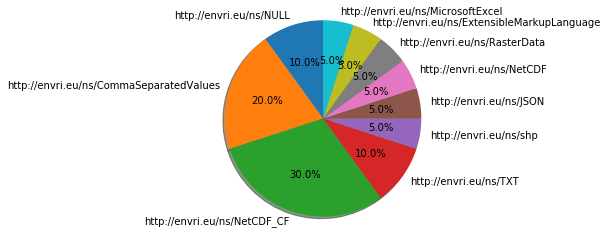

In [20]:
q = query("""
PREFIX dcterms: <http://purl.org/dc/terms/>
PREFIX envri: <http://envri.eu/ns/>
PREFIX rm: <http://www.oil-e.net/ontology/envri-rm.owl#>

SELECT ?rep_label ?format_name WHERE {
    [] a rm:ResearchInfrastructure ;
       envri:hasRepository [
         a envri:Repository ;
         rdfs:label ?rep_label ;
         envri:hasData [
           envri:hasPreferredFormat [
             envri:hasFormatName ?format_name 
          ]
         ]
       ]
}
""")

# display(q)
write(q, 'output-6format.xlsx')

c = collections.Counter(q['format_name'])

labels = list(c.keys())
sizes = list(c.values())
fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.show()